In [30]:
from sln import *
import networkx as nx
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
input_part_1 = parse_input("input.txt")
sample_input_part_1 = parse_input("sample_input.txt")
input_part_2 = parse_input("input.txt", False)
sample_input_part_2 = parse_input("sample_input.txt", False)

In [147]:
def draw_graph(input: Input, directed=True, sim_iters=1000, color_red=None):
    graph = input.graph
    df_graph = pd.DataFrame([
        {
            'source': node,
            'dest': adj_node,
            'cost': cost,
        }
        for node, adjs in graph.items()
        for adj_node, cost in adjs.items()
    ])

    G = nx.DiGraph() if directed else nx.Graph()
    for node, adjs in graph.items():
        for adj_node, cost in adjs.items():
            G.add_edge(node, adj_node, cost=cost)

    pos = nx.spring_layout(G, pos=None if directed else {n:n for n in graph}, iterations=sim_iters)
    node_labels = {input.start: 'S', input.end: 'E'}
    for node in graph:
        if node not in node_labels:
            node_labels[node] = f"{node[0]}\n{node[1]}"
    nx.draw(G, pos, labels=node_labels, font_size=8)
    labels = nx.get_edge_attributes(G, 'cost')
    nx.draw_networkx_edges(G, pos, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=5)


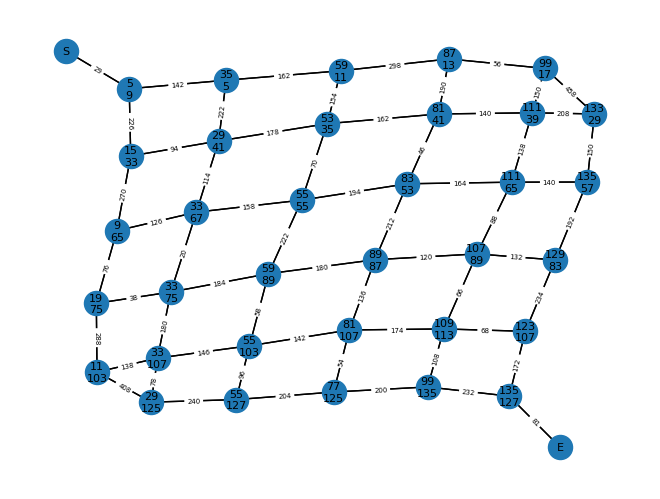

In [148]:
draw_graph(input_part_2, False)